In [94]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [95]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [96]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [97]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [98]:
len(dataset)

68

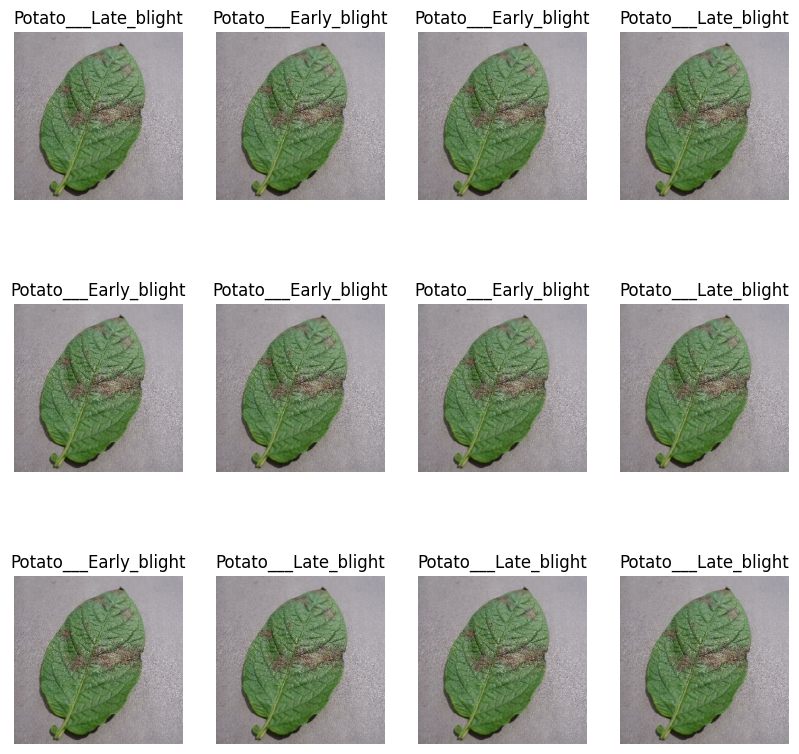

In [99]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3, 4, i + 1)
        #print(image_batch[0].numpy())
        #print(labels_batch.numpy())
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
        
   

In [100]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [101]:
train_ds = dataset.take(int(len(dataset)*train_size))
len(train_ds)

54

In [102]:
dataset.skip(int(len(dataset)*train_size))

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [103]:
test_ds=dataset.skip(int(len(dataset)*train_size))
len(test_ds)

14

In [104]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [105]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [106]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [133]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)#reshuffle_each_iteration=True)
    train_size = int(len(ds) * train_split)
    val_size = int(len(ds) * val_split)
    test_size = int(len(ds) * test_split)
    
    train_ds =ds.take(train_size)
    test_ds = ds.skip(train_size).skip(val_size)
    val_ds = ds.skip(train_size).take(val_size)
      
    return train_ds, val_ds, test_ds

In [134]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [135]:
len(train_ds), len(val_ds), len(test_ds)

(54, 6, 8)

In [137]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [141]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [142]:
data_agumentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
    ])